# This is the project for analyzing comapney sales and user's intrest

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import sklearn
from itertools import combinations
from collections import Counter
from sklearn.linear_model import LinearRegression


In [2]:
df=pd.read_csv("pizza_sales.csv")
df=df.dropna(how='any')
cols=df.columns
cols

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

## Popular pizza size

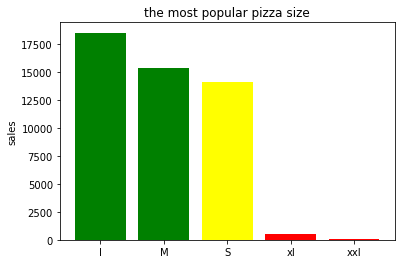

In [3]:
values=df['pizza_size'].value_counts().tolist()
plt.bar(['l','M','S','xl','xxl'],values,color=['green','green','yellow','red','red'])
plt.title('the most popular pizza size')
plt.ylabel('sales')
plt.show()


In [4]:
revenue=(df[cols[3]]*df[cols[6]]).sum()
print('TOTAL REVENUE:',revenue)


TOTAL REVENUE: 817860.05


In [5]:
print('THE AVG UNIT PRIZE OF PIZZA in $:',df[cols[6]].mean())

THE AVG UNIT PRIZE OF PIZZA in $: 16.494132044426163


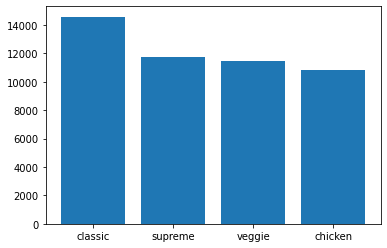

In [6]:
values=df[cols[9]].value_counts().tolist()
plt.bar(['classic','supreme','veggie','chicken'],values)
plt.show()



THE USERS ORDER:
PIZZA  QUANTITY
 1    47693
2      903
3       21
4        3
Name: quantity, dtype: int64


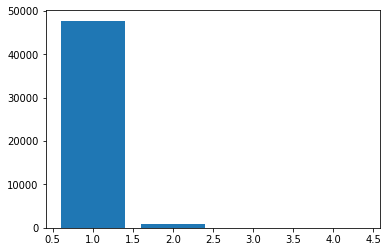

In [7]:
print('THE USERS ORDER:\nPIZZA  QUANTITY\n',df[cols[3]].value_counts())
plt.bar([1,2,3,4],df[cols[3]].value_counts())
plt.show()


#### MOST OF THE PEOPLE ORDERED 1 PIZZA AT AT TIME IN ONE ORDER

In [8]:
d={}
for i in range(len(df['order_id'])):
    if int(df['order_id'][i]) in d:
        d[int(df['order_id'][i])]+=int(df['quantity'][i])
    else:d[int(df['order_id'][i])]=1
key=max(d,key=d.get)
print('THE ORDER ID',key,"HAS THE PURCHASED THE MAXIMUM ORDER:",d[key])

THE ORDER ID 18845 HAS THE PURCHASED THE MAXIMUM ORDER: 26


In [9]:
# ['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
#        'order_time', 'unit_price', 'total_price', 'pizza_size',
#        'pizza_category', 'pizza_ingredients', 'pizza_name']

## At what time the sales was high?

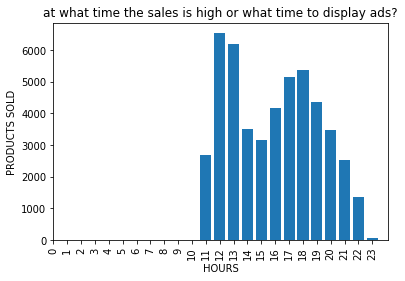

In [10]:
df['month']=df['order_date'].str.split('-').str[1]
df['time']=df['order_time'].str.split(':').str[0]
tempdic={}
for x in df['time'].unique():
    tempdic[int(x)]=0
for x in df['time']:
    for y in tempdic:
        if int(x)==int(y):
            tempdic[int(x)]+=1
plt.bar(tempdic.keys(),tempdic.values())
plt.title('at what time the sales is high or what time to display ads?')
plt.xticks(rotation=90)
plt.xticks(list(range(24)))
plt.xlabel("HOURS")
plt.ylabel("PRODUCTS SOLD")
plt.show()

## At what month the sales was high?

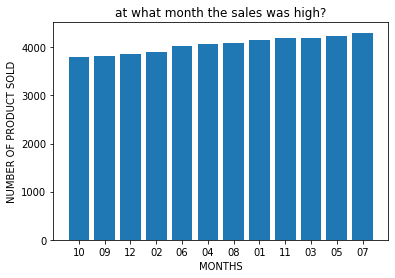

In [11]:
tempdic={}
for x in df['month'].unique():
    tempdic[x]=0
for x in df['month']:
    for y in tempdic:
        if x==y:
            tempdic[x]+=1
s=dict(sorted(tempdic.items(),key=lambda x:x[1]))
plt.bar(s.keys(),s.values())
plt.ylabel("NUMBER OF PRODUCT SOLD")
plt.xlabel("MONTHS")
plt.title('at what month the sales was high?')
plt.show()

## sales of different pizzas

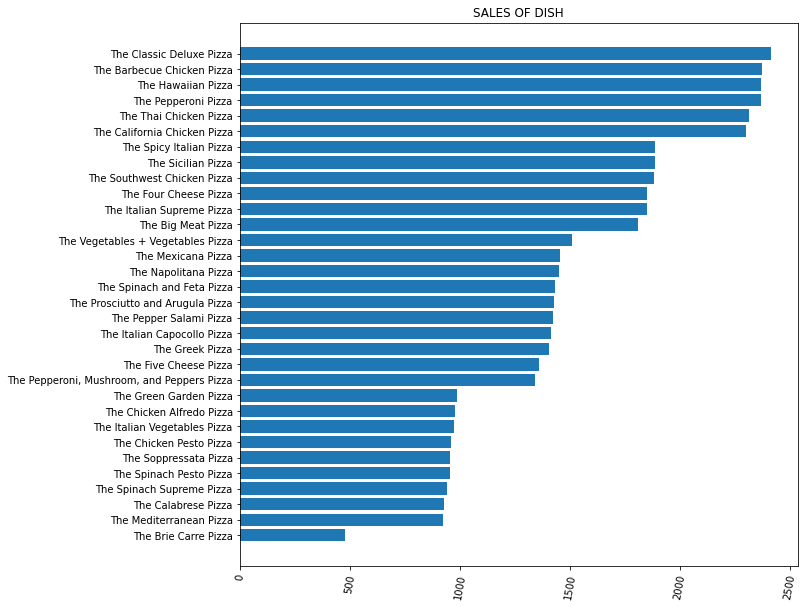

In [12]:
a=dict(df['pizza_name'].value_counts())
a=dict(sorted(a.items(),key=lambda x:x[1]))
key=list(a.keys())
lab=list(a.values())
plt.figure(figsize=(10,10))
plt.barh(key,width=lab,height=0.8)
plt.title('SALES OF DISH')
plt.xticks(rotation=80)
plt.show()

## correlation_matrix of 'pizza_size', 'pizza_name'

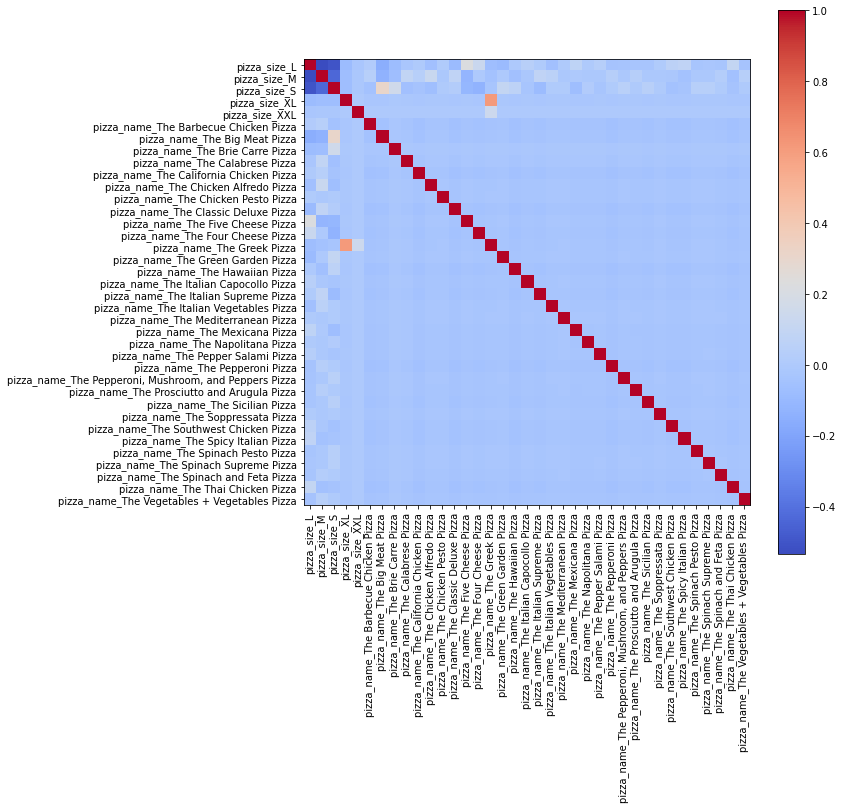

In [13]:
data = df[['pizza_size', 'pizza_name', 'time']]
data = pd.get_dummies(data, columns=['pizza_size', 'pizza_name'], prefix=['pizza_size', 'pizza_name'])
correlation_matrix = data.corr()
plt.figure(figsize=(10, 10))
plt.imshow(correlation_matrix, interpolation='nearest',cmap='coolwarm')
plt.colorbar()
x_labels = correlation_matrix.columns
x_positions = range(len(x_labels))
plt.xticks(x_positions, x_labels, rotation=90)
y_labels = correlation_matrix.columns
y_positions = range(len(y_labels))
plt.yticks(y_positions, y_labels)
plt.show()

## Top 10 Common Ingredients

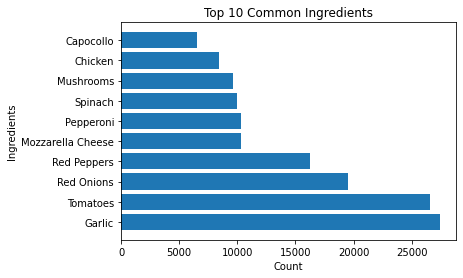

In [14]:
ingredients = df['pizza_ingredients'].str.split(', ').explode().value_counts()
plt.barh(ingredients.index[:10], ingredients.values[:10])
plt.xlabel("Count")
plt.ylabel("Ingredients")
plt.title("Top 10 Common Ingredients")
plt.show()

## correlation between 'quantity', 'unit_price', 'total_price'

<Figure size 576x432 with 0 Axes>

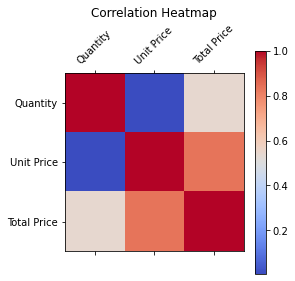

In [15]:

correlationmat = df[['quantity', 'unit_price', 'total_price']].corr()
plt.figure(figsize=(8, 6))
cax = plt.matshow(correlationmat, cmap='coolwarm')
plt.colorbar(cax)
labels = ['Quantity', 'Unit Price', 'Total Price']
plt.xticks(np.arange(len(labels)), labels, rotation=45)
plt.yticks(np.arange(len(labels)), labels)
plt.title("Correlation Heatmap")
plt.show()

In [16]:
correlationmat

,quantity,unit_price,total_price
quantity,1.000000,0.007142,0.541926
unit_price,0.007142,1.000000,0.836087
total_price,0.541926,0.836087,1.000000


#### There is a weak positive correlation between Quantity and Unit Price.There is a moderately strong positive correlation between Quantity and Total Price.There is a strong positive correlation between Unit Price and Total Price.

## combiantions of ingredients user ordered

In [17]:
counter=Counter()
for row in df['pizza_ingredients']:
    lis=row.split(',')
    counter.update(Counter(combinations(lis,5)))
for r,c in counter.most_common(10):
    print(r,c)


('Pepperoni', ' Mushrooms', ' Red Onions', ' Red Peppers', ' Bacon') 2416
('Barbecued Chicken', ' Red Peppers', ' Green Peppers', ' Tomatoes', ' Red Onions') 2372
('Barbecued Chicken', ' Red Peppers', ' Green Peppers', ' Tomatoes', ' Barbecue Sauce') 2372
('Barbecued Chicken', ' Red Peppers', ' Green Peppers', ' Red Onions', ' Barbecue Sauce') 2372
('Barbecued Chicken', ' Red Peppers', ' Tomatoes', ' Red Onions', ' Barbecue Sauce') 2372
('Barbecued Chicken', ' Green Peppers', ' Tomatoes', ' Red Onions', ' Barbecue Sauce') 2372
(' Red Peppers', ' Green Peppers', ' Tomatoes', ' Red Onions', ' Barbecue Sauce') 2372
('Chicken', ' Pineapple', ' Tomatoes', ' Red Peppers', ' Thai Sweet Chilli Sauce') 2315
('Chicken', ' Artichoke', ' Spinach', ' Garlic', ' Jalapeno Peppers') 2302
('Chicken', ' Artichoke', ' Spinach', ' Garlic', ' Fontina Cheese') 2302


#### these are the combinations of the ingredients users usually purchase extra so making new type of pizza with therse indredients in it would probably increase sales

# predicting the future sales

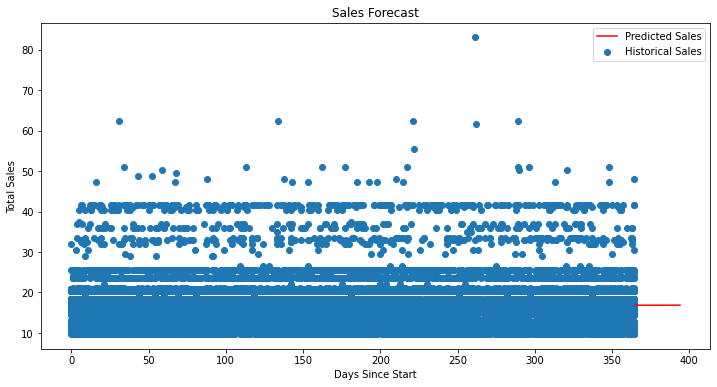

In [18]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['sincestart'] = (df['order_date'] - df['order_date'].min()).dt.days
x = df['sincestart'].values.reshape(-1, 1) 
y = df['total_price'].values  
model = LinearRegression()
model.fit(x, y)
future_days = np.arange(max(df['sincestart']) + 1, max(df['sincestart']) + 31)  
future_sales = model.predict(future_days.reshape(-1, 1))
plt.figure(figsize=(12, 6))
plt.scatter(df['sincestart'], df['total_price'], label='Historical Sales')
plt.plot(future_days, future_sales, label='Predicted Sales', color='red')
plt.title('Sales Forecast')
plt.xlabel('Days Since Start')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

## combinations sold based on pizza id

In [19]:
df['grouped']=df.groupby('order_id')['pizza_name_id'].transform(lambda x:','.join(x))
count=Counter()
for row in df['grouped']:
    lis=row.split(',')
    count.update(Counter(combinations(lis,2)))
for r,c in count.most_common(10):
    print(r,c)


('big_meat_s', 'thai_ckn_l') 958
('big_meat_s', 'four_cheese_l') 850
('big_meat_s', 'five_cheese_l') 763
('big_meat_s', 'classic_dlx_m') 688
('big_meat_s', 'spicy_ital_l') 680
('big_meat_s', 'cali_ckn_l') 676
('big_meat_s', 'southw_ckn_l') 626
('four_cheese_l', 'thai_ckn_l') 601
('five_cheese_l', 'spicy_ital_l') 599
('four_cheese_l', 'hawaiian_s') 595


## number of pizza sold based on piza id

In [20]:
pizzaid= df['grouped'].str.split(',').explode().value_counts()
pizzaid

big_meat_s        6182
thai_ckn_l        4711
five_cheese_l     4702
four_cheese_l     4629
classic_dlx_m     4071
                  ... 
mexicana_s         575
ckn_alfredo_s      356
calabrese_s        327
green_garden_l     326
the_greek_xxl       83
Name: grouped, Length: 91, dtype: int64

## pizzas the user buyed together

In [21]:
df['grouped1']=df.groupby('order_id')['pizza_name'].transform(lambda x:','.join(x))
countr=Counter()
for row in df['grouped1']:
    lis=row.split(',')
    countr.update(Counter(combinations(lis,3)))
for r,c in countr.most_common(10):
    print(r,c)


('The Pepperoni', ' Mushroom', ' and Peppers Pizza') 5134
('The Hawaiian Pizza', 'The Pepperoni', ' Mushroom') 1342
('The Hawaiian Pizza', 'The Pepperoni', ' and Peppers Pizza') 1342
('The Hawaiian Pizza', ' Mushroom', ' and Peppers Pizza') 1342
('The Classic Deluxe Pizza', 'The Pepperoni', ' Mushroom') 1315
('The Classic Deluxe Pizza', 'The Pepperoni', ' and Peppers Pizza') 1315
('The Classic Deluxe Pizza', ' Mushroom', ' and Peppers Pizza') 1315
('The Barbecue Chicken Pizza', 'The Pepperoni', ' Mushroom') 1214
('The Barbecue Chicken Pizza', 'The Pepperoni', ' and Peppers Pizza') 1214
('The Barbecue Chicken Pizza', ' Mushroom', ' and Peppers Pizza') 1214


## pizza sales based on grouped data by id


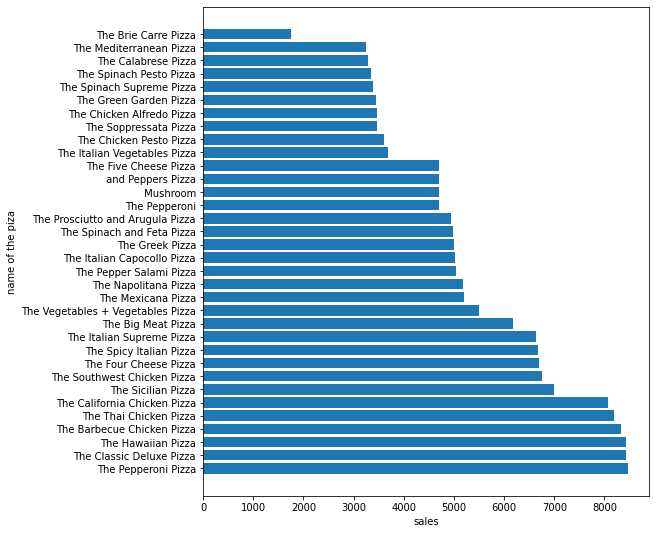

In [22]:
psc=df['grouped1'].str.split(',').explode().value_counts()
plt.figure(figsize=(8,9))
plt.barh(psc.index,psc.values)
plt.xlabel('sales')
plt.ylabel('name of the piza')
plt.show()

In [23]:
# ['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
#        'order_time', 'unit_price', 'total_price', 'pizza_size',
#        'pizza_category', 'pizza_ingredients', 'pizza_name']

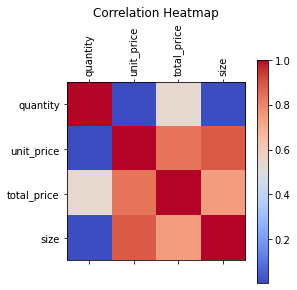

,quantity,unit_price,total_price,size
quantity,1.000000,0.007142,0.541926,0.012105
unit_price,0.007142,1.000000,0.836087,0.884455
total_price,0.541926,0.836087,1.000000,0.742604
size,0.012105,0.884455,0.742604,1.000000


In [24]:
size= {'S':0,'M': 1, 'L': 2,'XL':3, 'XXL': 4}
df['size'] = df['pizza_size'].replace(size)
df['size'].astype(int)
df['time'].astype(int)
comat=df[['quantity','unit_price','total_price','time','size']].corr()
cax=plt.matshow(comat,cmap='coolwarm')
plt.colorbar(cax)
labels=['quantity','unit_price','total_price','size']
plt.xticks(np.arange(len(labels)), labels, rotation=90)
plt.yticks(np.arange(len(labels)), labels)
plt.title("Correlation Heatmap")
plt.show()
comat